In [1]:
# Loading the IMDB dataset
import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) =  imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# Inspecting the data
quad = [train_data, train_labels, test_data, test_labels]
[print(i[0]) for i in quad]
[i.shape for i in quad]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 

[(25000,), (25000,), (25000,), (25000,)]

In [3]:
print("data includes {} words".format(max([max(seq) for seq in train_data])))
print("proportion of good reviews is", sum(train_labels)/len(train_labels))

data includes 9999 words
proportion of good reviews is 0.5


In [4]:
# build a procedure to decode a review number list back to english words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverses the mapping
decoded_review = lambda i: ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
decoded_review(1)

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [5]:
# Encoding the integer sequences into a binary matrix

def vectorize_seq(seq, dimension=10000):
    result = np.zeros((len(seq), dimension))
    for i, s in enumerate(seq):
        result[i, s] = 1
    return result

vectorize_seq([[1, 2, 3, 4], [7, 8]], 10)

array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

In [6]:
# vectorizing the data
X_train = vectorize_seq(train_data)
X_test = vectorize_seq(test_data)

In [7]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray( test_labels).astype('float32')

In [8]:
# define the model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# to customize compilation
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## Fitting all the training data

In [10]:
# fit the model
%time model.fit(X_train, y_train, epochs=20, batch_size=512)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
25000/25000 [==============================] - 5s 214us/step - loss: 0.4496 - binary_accuracy: 0.8165
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.2552 - binary_accuracy: 0.9093
Epoch 3/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1969 - binary_accuracy: 0.9298
Epoch 4/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1669 - binary_accuracy: 0.9409
Epoch 5/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1432 - binary_accuracy: 0.9487
Epoch 6/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1266 - binary_accuracy: 0.9561
Epoch 7/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1128 - binary_accuracy: 0.9609
Epoch 8/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.1010 - binary_accuracy: 0.9650
Epoch 9/20
25000/25000 [==============================]

In [11]:
# savnig the model to the disk
model.save('model.h5')

In [12]:
print(model.metrics_names)
model.evaluate(X_test, y_test)

['loss', 'binary_accuracy']
25000/25000 [==============================] - 3s 131us/step


[0.7758532072401046, 0.84912]

## Dividing data into training and validation

In [13]:
# set aside a validation set
n = 10000
X_val     = X_train[:n]
X_train_p = X_train[n:]

y_val     = y_train[:n]
y_train_p = y_train[n:]

# train the model
model.compile(optimizer=optimizers.RMSprop(lr=0.005), loss=losses.binary_crossentropy, metrics=['acc'])
%time history = model.fit(X_train_p, y_train_p, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.5251 - acc: 0.9049 - val_loss: 0.1940 - val_acc: 0.9244
Epoch 2/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1604 - acc: 0.9450 - val_loss: 0.1363 - val_acc: 0.9461
Epoch 3/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1188 - acc: 0.9662 - val_loss: 0.1565 - val_acc: 0.9405
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1116 - acc: 0.9740 - val_loss: 0.2173 - val_acc: 0.9288
Epoch 5/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.0911 - acc: 0.9802 - val_loss: 0.2099 - val_acc: 0.9275
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0952 - acc: 0.9832 - val_loss: 0.2319 - val_acc: 0.9199
Epoch 7/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0072 - acc: 0.9995 - val_loss: 0.3283 - 

In [14]:
hdict = history.history
hdict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

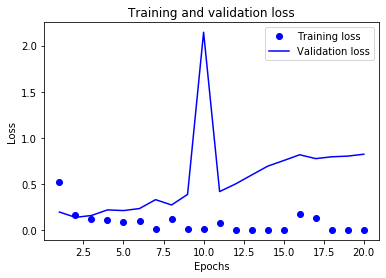

In [25]:
# plotting the training and validation loss
from matplotlib import pyplot as plt
loss = hdict['loss']
val_loss = hdict['val_loss']

epochs = range (1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
def plot_metric(metricname, trainmetrics, valmetrics):
    epochs = range(1, len(trainmetrics) + 1)
    
    plt.clf()
    plt.plot(epochs, trainmetrics, 'bo', label='Training '   + metricname)
    plt.plot(epochs, valmetrics  , 'b', label='Validation ' + metricname)
    plt.title("Training and validation " +  metricname)
    plt.xlabel('Epochs')
    plt.ylabel(metricname)
    plt.legend()
    plt.show()
    return plt

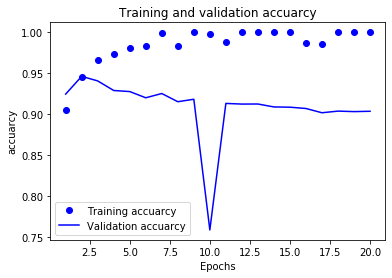

<module 'matplotlib.pyplot' from 'C:\\Langs\\Python\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
# plotting the training and validation accuracy
acc_values = hdict['acc']
val_acc_values = hdict['val_acc']
plot_metric('accuarcy', acc_values, val_acc_values)

In [18]:
# retarin the model from scratch, and apply on test data
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=['acc'])
%time model.fit(X_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 3s 109us/step - loss: 0.4910 - acc: 0.8197
Epoch 2/5
25000/25000 [==============================] - 3s 100us/step - loss: 0.2806 - acc: 0.9057
Epoch 3/5
25000/25000 [==============================] - 2s 94us/step - loss: 0.2117 - acc: 0.9262
Epoch 4/5
25000/25000 [==============================] - 3s 108us/step - loss: 0.1760 - acc: 0.9392
Epoch 5/5
25000/25000 [==============================] - 3s 105us/step - loss: 0.1513 - acc: 0.9478
Wall time: 13.3 s
25000/25000 [==============================] - 3s 130us/step


In [19]:
print(model.metrics_names)
print(results)

['loss', 'acc']
[0.30977085721969605, 0.879]


In [20]:
model.predict(X_test)

array([[0.1363585 ],
       [0.99998605],
       [0.67819726],
       ...,
       [0.130557  ],
       [0.05042812],
       [0.6570998 ]], dtype=float32)

## Applying a logistic regression model to the same problem

In [21]:
from sklearn.linear_model import LogisticRegression

%time logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X_train, y_train)

Wall time: 30 s


C:\Langs\Python\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
logistic.score(X_test, y_test)

0.8626

In [23]:
logistic.predict(X_test)

array([0., 1., 0., ..., 0., 0., 1.], dtype=float32)

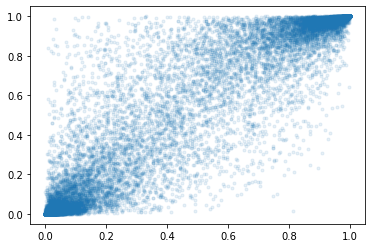

In [24]:
plt.plot(model.predict(X_test), 1-logistic.predict_proba(X_test).T[0], '.', alpha=0.1)